# Modelo Machine Learning -  Teste Superfície

Esse notebook mostra como foi feito o modelo de Machine Learning utilizado para avaliar a superfície das peças.

In [1]:
#Célula de imports
import cv2
i# Modelo Machine Learning -  Teste Superfície Video

Esse notebook mostra como foi feito o modelo de Machine Learning utilizado para avaliar a superfície das peças nos videos. mport os
import numpy as np
import matplotlib.pyplot as plt
from filtros_extras import *
from fillHoles import fillHoles
from sklearn.utils import shuffle


In [2]:
from tensorflow import keras

2023-04-16 22:51:28.817903: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
path = "NOK_superficie"
dir_list = os.listdir(path)
conjunto_NOK=[]
for k in range(0,len(dir_list)):
    #encontrar uma maneira mais bonita de fazer a soma das strings abaixo
    img_in = cv2.imread(path + "/" + str(dir_list[k]), cv2.IMREAD_COLOR)
    #img_in = cv2.imread("OK\Fig_OK_15.jpg", cv2.IMREAD_COLOR)
    if img_in is None:
        print("File not found. Bye!")
        exit(0) #Essa linha "crasha" o notebook, caso ocorra reinicar o kernel
    [B,G,R] = cv2.split(img_in)
    conjunto_NOK.append(R)
#     plt.figure(figsize=(10,5))
#     plt.subplot (3,5,k+1)
#     plt.imshow(R, cmap="gray")
conjunto_NOK = np.stack(conjunto_NOK, axis=0)

plt.show()

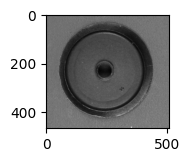

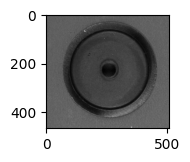

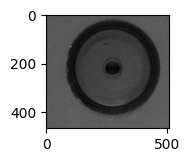

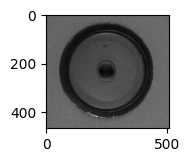

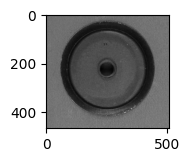

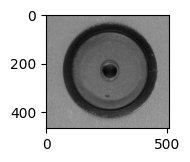

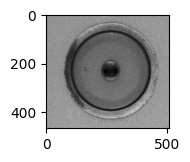

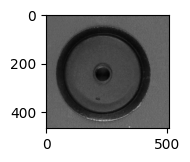

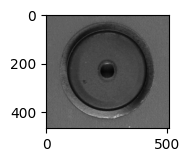

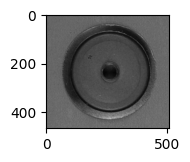

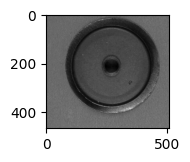

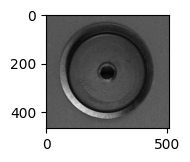

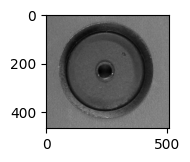

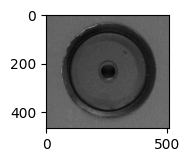

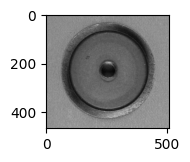

In [4]:
path = "OK"
dir_list = os.listdir(path)
conjunto_OK=[]
for k in range(0,len(dir_list)):
    #encontrar uma maneira mais bonita de fazer a soma das strings abaixo
    img_in = cv2.imread(path + "/" + str(dir_list[k]), cv2.IMREAD_COLOR)
    #img_in = cv2.imread("OK\Fig_OK_15.jpg", cv2.IMREAD_COLOR)
    if img_in is None:
        print("File not found. Bye!")
        exit(0) #Essa linha "crasha" o notebook, caso ocorra reinicar o kernel
    [B,G,R] = cv2.split(img_in)
    conjunto_OK.append(R)
    plt.figure(figsize=(10,5))
    plt.subplot (3,5,k+1)
    plt.imshow(R, cmap="gray")
conjunto_OK = np.stack(conjunto_OK, axis=0)

plt.show()

In [5]:
nok_labels = np.zeros(conjunto_NOK.shape[0])
ok_labels = np.ones(conjunto_OK.shape[0])


In [6]:
X = np.concatenate([conjunto_NOK, conjunto_OK], axis=0)
y = np.concatenate([nok_labels, ok_labels], axis=0)

In [7]:
X, y = shuffle(X, y, random_state=42)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test_final, y_train, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation object
kf = KFold(n_splits=num_folds)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(468, 508, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Loop over the folds
fold_scores = []
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the test data
    score = model.evaluate(X_test, y_test, verbose=0)[1]

    # Add the score to the list of fold scores
    fold_scores.append(score)

# Compute the mean and standard deviation of the fold scores
mean_score = np.mean(fold_scores)
std_score = np.std(fold_scores)

print("Mean score: {:.3f}, Standard deviation: {:.3f}".format(mean_score, std_score))




Mean score: 0.640, Standard deviation: 0.320


In [ ]:
# from sklearn.model_selection import KFold
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# # Define the number of folds for cross-validation
# num_folds = 5

# # Define the cross-validation object
# kf = KFold(n_splits=num_folds)

# # Define the CNN model
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(468, 508, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Loop over the folds
# fold_scores = []
# for train_index, test_index in kf.split(X_train):
#     # Split the data into training and test sets for this fold
#     X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
#     y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

#     # Train the model on the training data for this fold
#     model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

#     # Evaluate the model on the test data for this fold
#     score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]

#     # Add the score to the list of fold scores
#     fold_scores.append(score)

# # Compute the mean and standard deviation of the fold scores
# mean_score = np.mean(fold_scores)
# std_score = np.std(fold_scores)

# print("Mean score: {:.3f}, Standard deviation: {:.3f}".format(mean_score, std_score))


In [10]:
model.predict(X)

1/1 [==============================] - 2s 2s/step


array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [12]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 1.000000
Loss: 0.000000


In [13]:
model.save('superficie_ML.h5')

## Conclui-se assim que é possível distiguir corretamente todas as imagens dos OK com os NOK_superfície.